<a href="https://colab.research.google.com/github/premswaroopmusti/Prophaze_tasks/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the Dependencies**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import tensorflow_hub as hub
# !pip install --upgrade tensorflow-text
import tensorflow_text as text
from dateutil import parser
from collections import Counter
from datetime import datetime, date
import numpy as np
from collections import OrderedDict
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

### **Data Collection & Pre-Processing**

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Dataset/123dataset.csv");

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
timevalue_list = list(data['@timestamp'])
request_list = list(data['request'])
ip_address = list(data['remote_addr'])
reffer_list = list(data['http_referrer'])
status_list = list(data['status'])
user_agent_list = list(data['http_user_agent'])

Creating a list of bad bots

In [ ]:
bad_bots_keywords = ['01h4x.com', '360spider', '404checker', '404enemy', '80legs', 'admantx', 'aibot', 'alittleclient', 'aspseek', 'abonti', 'aboundex', 'aboundexbot', 'acunetix', 'adstxtcrawlertp', 'afdverbotsverfahren', 'ahrefsbot', 'aihitbot', 'aipbot', 'alexibot', 'allsubmitter', 'alligator', 'alphabot', 'anarchie', 'anarchy', 'anarchy99', 'ankit', 'anthill', 'apexoo', 'aspiegel', 'asterias', 'atomseobot', 'attach', 'awariorssbot', 'awariosmartbot', 'bbbike', 'bdcbot', 'bdfetch', 'blexbot', 'backdoorbot', 'backstreet', 'backweb', 'backlinkceck', 'backlinkcrawler', 'badass', 'bandit', 'barkrowler', 'batchftp', 'battleztarbazinga', 'betabot', 'bigfoot', 'bitacle', 'blackwidow', 'blackhole', 'blackboard', 'blow', 'blowfish', 'boardreader', 'bolt', 'botalot', 'brandprotect', 'brandwatch', 'buck', 'buddy', 'builtbottough', 'builtwith', 'bullseye', 'bunnyslippers', 'buzzsumo', 'bytespider', 'catexplorador', 'ccbot', 'code87', 'cshttp', 'calculon', 'cazoodlebot', 'cegbfeieh', 'censysinspect', 'cheteam', 'cheesebot', 'cherrypicker', 'chinaclaw', 'chlooe', 'citoid', 'claritybot', 'cliqzbot', 'cloudmapping', 'cocolyzebot', 'cogentbot', 'collector', 'copier', 'copyrightcheck', 'copyscape', 'cosmos', 'craftbot', 'crawlingathomeproject', 'crazywebcrawler', 'crescent', 'crunchbot', 'curious', 'custo', 'cyotekwebcopy', 'dblbot', 'diibot', 'dsearch', 'dtsagent', 'datacha0s', 'databasedrivermysqli', 'demon', 'deusu', 'devil', 'digincore', 'digitalpebble', 'dirbuster', 'disco', 'discobot', 'discoverybot', 'dispatch', 'dittospyder', 'dnbcrawleranalytics', 'dnyzbot', 'domcopbot', 'domainappender', 'domaincrawler', 'domainsigmacrawler', 'domainstatsbot', 'domainsproject', 'dotbot', 'downloadwonder', 'dragonfly', 'drip', 'eccp1.0', 'emailsiphon', 'emailwolf', 'easydl', 'ebingbong', 'ecxi', 'eirgrabber', 'erocrawler', 'evil', 'exabot', 'expresswebpictures', 'extlinksbot', 'extractor', 'extractorpro', 'extremepicturefinder', 'eyenetie', 'ezooms', 'fdm', 'fhscan', 'femtosearchbot', 'fimap', 'firefox7.0', 'flashget', 'flunky', 'foobot', 'freeuploader', 'frontpage', 'fuzz', 'fyberspider', 'fyrebot', 'gigabot', 'gptbot', 'gtwww', 'galaxybot', 'genieo', 'germcrawler', 'getright', 'getweb', 'getintent', 'gigabot', 'gozilla', 'goaheadgotit', 'gozilla', 'gotit', 'grabnet', 'grabber', 'grafula', 'grapefx', 'grapeshotcrawler', 'gridbot', 'headmasterseo', 'hmview', 'htmlparser', 'httplite', 'httrack', 'haansoft', 'haosouspider', 'harvest', 'havij', 'heritrix', 'hloader', 'honolulubot', 'humanlinks', 'hybridbot', 'idbte4m', 'idbot', 'irlbot', 'iblog', 'idsearch', 'ilsebot', 'imagefetch', 'imagesucker', 'indeedbot', 'indylibrary', 'infonavirobot', 'infotekies', 'intelliseek', 'interget', 'internetseer', 'internetninja', 'iria', 'iskanie', 'istellabot', 'jocwebspider', 'jamesbot', 'jbrofuzz', 'jennybot', 'jetcar', 'jetty', 'jikespider', 'joomla', 'jorgee', 'justview', 'jyxobot', 'kenjinspider', 'keybottranslationsearchmachine', 'keyworddensity', 'kinza', 'kozmosbot', 'lnspiderguy', 'lwpsimple', 'lanshanbot', 'larbin', 'leechftp', 'leechget', 'lexibot', 'lftp', 'libweb', 'libwhisker', 'liebaofast', 'lightspeedsystems', 'likse', 'linkscan', 'linkwalker', 'linkbot', 'linkextractorpro', 'linkpadbot', 'linksmanager', 'linqiametadatadownloaderbot', 'linqiarssbot', 'linqiascrapebot', 'lipperhey', 'lipperheyspider', 'litemage_walker', 'lmspider', 'ltx71', 'mfc_tear_sample', 'midowntool', 'miixpc', 'mj12bot', 'mqqbrowser', 'msfrontpage', 'msiecrawler', 'mtrobot', 'magnet', 'magnet', 'mail.ru_bot', 'majesticseo', 'majestic12', 'majesticseo', 'markmonitor', 'markwatch', 'massdownloader', 'masscan', 'matahari', 'mauibot', 'mb2345browser', 'meanpathbot', 'meanpathbot', 'mediatoolkitbot', 'megaindex.ru', 'metauri', 'micromessenger', 'microsoftdataaccess', 'microsofturlcontrol', 'minefield', 'misterpix', 'mojeek', 'mojolicious', 'molokaibot', 'morfeusfuckingscanner', 'mr.4x3', 'msrabot', 'musobot', 'nicerspro', 'npbot', 'nameintelligence', 'nameprotect', 'navroad', 'nearsite', 'needle', 'nessus', 'netants', 'netlyzer', 'netmechanic', 'netspider', 'netzip', 'netvampire', 'netcraft', 'nettrack', 'netvibes', 'nextgensearchbot', 'nibbler', 'nikibot', 'nikto', 'nimblecrawler', 'nimbostratus', 'ninja', 'nmap', 'nuclei', 'nutch', 'octopus', 'offlineexplorer', 'offlinenavigator', 'oncrawl', 'openlinkprofiler', 'openvas', 'openfind', 'openvas', 'orangebot', 'orangespider', 'outclicksbot', 'outfoxbot', 'peclhttp', 'phpcrawl', 'poecomponentclienthttp', 'pageanalyzer', 'pagegrabber', 'pagescorer', 'pagething.com', 'pageanalyzer', 'pandalytics', 'panscient', 'papafoto', 'pavuk', 'peoplepal', 'petalbot', 'pimonster', 'picscout', 'picsearch', 'picturefinder', 'piepmatz', 'pimonster', 'pixray', 'pleasecrawl', 'pockey', 'propowerbot', 'prowebwalker', 'probethenet', 'proximic', 'psbot', 'pu_in', 'pump', 'pxbroker', 'pycurl', 'querynmetasearch', 'quickcrawler', 'rssingbot', 'rankactive', 'rankactivelinkbot', 'rankflex', 'rankingbot', 'rankingbot2', 'rankivabot', 'rankurbot', 'rere', 'reget', 'realdownload', 'reaper', 'rebelmouse', 'recorder', 'redesscrapy', 'repomonkey', 'ripper', 'rocketcrawler', 'rogerbot', 'sbider', 'seokicks', 'seokicksrobot', 'seolyticscrawler', 'seoprofiler', 'seostats', 'sistrix', 'smtbot', 'salesintelligent', 'scanalert', 'scanbot', 'scoutjet', 'scrapy', 'screaming', 'screenerbot', 'screpybot', 'searchestate', 'searchmetricsbot', 'seekport', 'seekportbot', 'semanticjuice', 'semrush', 'semrushbot', 'sentibot', 'senutobot', 'seositecheckup', 'seobilitybot', 'seomoz', 'shodan', 'siphon', 'sitecheckerbotcrawler', 'siteexplorer', 'sitelockspider', 'sitesnagger', 'sitesucker', 'sitesucker', 'sitebeam', 'siteimprove', 'sitevigil', 'slysearch', 'smartdownload', 'snake', 'snapbot', 'snoopy', 'socialrankiobot', 'sociscraper', 'sogouwebspider', 'sosospider', 'sottopop', 'spacebison', 'spammen', 'spankbot', 'spanner', 'spbot', 'spinn3r', 'sputnikbot', 'sqlmap', 'sqlworm', 'sqworm', 'steeler', 'stripper', 'sucker', 'sucuri', 'superbot', 'superhttp', 'surfbot', 'surveybot', 'suzuran', 'swiftbot', 'szukacz', 't0phackteam', 't8abot', 'teleport', 'teleportpro', 'telesoft', 'telesphoreo', 'telesphorep', 'thenomad', 'theintraformant', 'thumbor', 'tighttwatbot', 'titan', 'toata', 'toweyabot', 'tracemyfile', 'trendiction', 'trendictionbot', 'true_robot', 'turingos', 'turnitin', 'turnitinbot', 'twengabot', 'twice', 'typhoeus', 'urly.warning', 'urlywarning', 'unisterbot', 'upflow', 'vbot', 'vbproject', 'vci', 'vacuum', 'vagabondo', 'velenpublicwebcrawler', 'vericitecrawler', 'vidiblescraper', 'virusdie', 'voideye', 'voil', 'voltron', 'wasalivebot', 'wbsearchbot', 'webdav', 'wisenutbot', 'wpscan', 'wwwcollectore', 'wwwmechanize', 'wwwmechanize', 'wwwoffle', 'wallpapers', 'wallpapers3.0', 'wallpapershd', 'wesee', 'webauto', 'webbandit', 'webcollage', 'webcopier', 'webenhancer', 'webfetch', 'webfuck', 'webgois', 'webimagecollector', 'webleacher', 'webpix', 'webreaper', 'websauger', 'webstripper', 'websucker', 'webwhacker', 'webzip', 'webauto', 'webcollage', 'webenhancer', 'webfetch', 'webfuck', 'webpix', 'websauger', 'websucker', 'webalta', 'webmasterworldforumbot', 'webshag', 'websiteextractor', 'websitequester', 'websitequester', 'webster', 'whack', 'whacker', 'whatweb', 'who.isbot', 'widow', 'winhttrack', 'wiseguysrobot', 'wonderbot', 'woobot', 'wotbox', 'wprecon', 'xaldonwebspider', 'xaldon_webspider', 'xenu', 'youdaobot', 'zade', 'zauba', 'zermelo', 'zeus', 'zitebot', 'zmeu', 'zoombot', 'zoominfobot', 'zumbot', 'zyborg', 'adscanner', 'archive.org_bot', 'arquivowebcrawler', 'arquivo.pt', 'autoemailspider', 'backlinkcheck', 'cah.io.community', 'check1.exe', 'clarkcrawler', 'coccocbot', 'cognitiveseo', 'com.plumanalytics', 'crawl.sogou.com', 'crawler.feedback', 'crawler4j', 'dataforseo.com', 'dataforseobot', 'demandbasebot', 'domainsproject.org', 'ecatch', 'evcbatch', 'facebookscraper', 'gopher', 'heritrix', 'instabid', 'internetvistamonitor', 'ipsagent', 'isitwp.com', 'iubendaradar', 'linkdexbot', 'lwprequest', 'lwptrivial', 'magpiecrawler', 'meanpathbot', 'mediawords', 'muhstikscan', 'netestatenecrawler', 'openai', 'openai.com', 'pagescorer', 'pcbrowser', 'plumanalytics', 'polarisversion', 'probeimagesize', 'ripz', 's1z.ru', 'satoristudio.net', 'scalajhttp', 'scan.lol', 'seobility', 'seocompany.store', 'seoscanners', 'seostar', 'serpstatbot', 'sexsearcher', 'sitechecker.pro', 'siteripz', 'sogouspider', 'sp_auditbot', 'spyfu', 'sysscan', 'takeout', 'trendiction.com', 'trendiction.de', 'ubermetricstechnologies.com', 'voyagerx.com', 'webgainsbot', 'webmeupcrawler', 'webpros.com', 'webprosbot', 'x09mozilla', 'x22mozilla', 'xpymep1.exe', 'zauba.io', 'zgrab']
good_bots_keywords = ["googlebot","bingbot","slackbot","watsonassistant","yahoobot","duckduckBot","baiduspider","yandexbot","exabot","slurpbot","facebookexternalhit","applebot","deepcrawl","Octoparse","httrack","sitesucker","yandexrenderresourcesbot"]

In [ ]:
bad_bots_keywords = set(bad_bots_keywords)

In [ ]:
bot_list_user_agent = []
for i in user_agent_list:
  i = i.replace("  ","")
  i = i.replace(" ","")
  if " " in i or "  " in i:
    print(True)
  bot_list_user_agent.append(i)
bot_list_user_agent = [x.lower() for x in bot_list_user_agent]

In [ ]:
bad_source = []
good_source = []
for i in bot_list_user_agent:
  for j in bad_bots_keywords:
    if j in i:
      bad_source.append(i)
      break

good_source = [x for x in bot_list_user_agent if x not in bad_source]
np.unique(bad_source)

array(['alittleclient', 'anthill',
       'awariosmartbot/1.0(+https://awario.com/bots.html;bots@awario.com)',
       'expanse,apaloaltonetworkscompany,searchesacrosstheglobalipv4spacemultipletimesperdaytoidentifycustomers&#39;presencesontheinternet.ifyouwouldliketobeexcludedfromourscans,pleasesendipaddresses/domainsto:scaninfo@paloaltonetworks.com',
       'mediatoolkitbot(complaints@mediatoolkit.com)',
       'mozilla/4.5(compatible;httrack3.0x;windows98)',
       'mozilla/5.0(compatible;ahrefsbot/7.0;+http://ahrefs.com/robot/)',
       'mozilla/5.0(compatible;blexbot/1.0;+http://webmeup-crawler.com/)',
       'mozilla/5.0(compatible;bytespider;spider-feedback@bytedance.com)applewebkit/537.36(khtml,likegecko)chrome/70.0.0.0safari/537.36',
       'mozilla/5.0(compatible;censysinspect/1.1;+https://about.censys.io/)',
       'mozilla/5.0(compatible;coccocbot-image/1.0;+http://help.coccoc.com/searchengine)',
       'mozilla/5.0(compatible;coccocbot-web/1.0;+http://help.coccoc.com/searche

In [ ]:
list123 = ['mozilla/5.0(iphone;cpuiphoneos6_0likemacosx)applewebkit/536.26(khtml,likegecko)version/6.0mobile/10a5376esafari/8536.25(compatible;siteauditbot/0.97;+http://www.semrush.com/bot.html)',



'mozilla/5.0(linux;android13;m2007j1scbuild/tkq1.221114.001;wv)applewebkit/537.36(khtml,likegecko)version/4.0chrome/107.0.5304.141mobilesafari/537.36xweb/5127mmwebsdk/20230405mmwebid/1151micromessenger/8.0.35.2360(0x2800235d)wechat/arm64weixinnettype/wifilanguage/zh_cnabi/arm64qcloudcdn-xinanrequest-source=4request-channel=99',


       'mozilla/5.0(windows;u;windowsnt5.1;en-us;bolt/2.340)applewebkit/530+(khtml,likegecko)version/4.0safari/530.17untrusted/1.03gpp-gbauntrusted/1.0',

'mozilla/5.0+(compatible;uptimerobot/2.0;http://www.uptimerobot.com/)',

       'mozilla/5.0zgrab/0.x',

'screamingfrogseospider/16.7',

       'screamingfrogseospider/19.0', 'screamingfrogseospider/19.1',

       'slack-imgproxy(+https://api.slack.com/robots)',

       'slackbot-linkexpanding1.0(+https://api.slack.com/robots)',

       'slackbot1.0(+https://api.slack.com/robots)']
for i in list123:
  for j in bad_bots_keywords:
    if j in i:
      print(j)
      bad_source.append(i)
      break

semrush
micromessenger
bolt
zgrab
screaming
screaming
screaming


In [ ]:
data1 = {}
data1['user_agents'] = bad_source
data1['traffic'] = ["Bad"] * len(bad_source)

data2 = {}
data2['user_agents'] = good_source
data2['traffic'] = ["Good"] * len(good_source)

In [ ]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [ ]:
df = df1.append(df2, ignore_index=True)

<ipython-input-53-66f99341a515>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, ignore_index=True)


In [ ]:
df

,user_agents,traffic
0,mozilla/5.0(linux;android7.0;)applewebkit/537....,Bad
1,mozilla/5.0(linux;android7.0;)applewebkit/537....,Bad
2,mozilla/5.0(compatible;dotbot/1.2;+https://ope...,Bad
3,mozilla/5.0(linux;android7.0;)applewebkit/537....,Bad
4,mozilla/5.0(compatible;dotbot/1.2;+https://ope...,Bad
...,...,...
129402,mozilla/5.0(windowsnt10.0;win64;x64)applewebki...,Good
129403,mozilla/5.0(windowsnt10.0;win64;x64)applewebki...,Good
129404,bunnyoptimizer-v01,Good
129405,mozilla/5.0(windowsnt10.0;win64;x64)applewebki...,Good


In [ ]:
df.groupby('traffic').describe()


user_agents                                                            \
              count unique                                                top   
traffic                                                                         
Bad           13729     45  mozilla/5.0(compatible;velenpublicwebcrawler/1...   
Good         115678   1086                                               none   

                
          freq  
traffic         
Bad       4868  
Good     21099

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
13729/115678

# so 12% is bad traffic and 88% is good traffic
# so definitely an imbalance in the dataset

0.11868289562405988

In [ ]:
# missing values
df.isnull().sum()

user_agents    0
traffic        0
dtype: int64

We will use a technique called Down-Sampling to balance the dataset

So we will pick any random 13729 samples from 115678 good traffic & we will discard remaining good traffic

In this way we will be having equal amount of good traffic and bad traffic

In [ ]:
df_bad = df[df['traffic'] == 'Bad']
df_bad.shape

(13729, 2)

In [ ]:
df_good = df[df['traffic'] == 'Good']
df_good.shape

(115678, 2)

In [ ]:
df_good.sample(2)

,user_agents,traffic
61664,"mozilla/5.0applewebkit/537.36(khtml,likegecko;...",Good
24153,bunnyoptimizer-v01,Good


In [ ]:
df_good_downsampled = df_good.sample(df_bad.shape[0])
df_good_downsampled.shape

(13729, 2)

Now both good traffic and bad traffic have 13729 samples


In [ ]:
# now lets concatenate good traffic and bad traffic together
df_balanced = pd.concat([df_bad, df_good_downsampled])
df_balanced.shape


(27458, 2)

In [ ]:
df_balanced['traffic'].value_counts()

Bad     13729
Good    13729
Name: traffic, dtype: int64

In [ ]:
df_balanced.sample(5)

,user_agents,traffic
42285,mozilla/5.0+(compatible;uptimerobot/2.0;http:/...,Good
6174,mozilla/5.0(compatible;mj12bot/v1.4.8;http://m...,Bad
98592,mozilla/5.0(windowsnt10.0;win64;x64;rv:109.0)g...,Good
98586,mozilla/5.0(windowsnt10.0;win64;x64;rv:109.0)g...,Good
3635,mozilla/5.0(compatible;velenpublicwebcrawler/1...,Bad


In [ ]:
df_balanced['user_agents'][9781]

'mozilla/5.0(linux;android7.0;)applewebkit/537.36(khtml,likegecko)mobilesafari/537.36(compatible;petalbot;+https://webmaster.petalsearch.com/site/petalbot)'

Label Encoding

In [ ]:
# now lets create a new column called bad, bcz column traffic is a text column, i want to create a binary column called bad
df_balanced['bad'] = df_balanced['traffic'].apply(lambda x: 1 if x == 'Bad' else 0)
df_balanced.sample(5)

,user_agents,traffic,bad
9622,mozilla/5.0(linux;android7.0;)applewebkit/537....,Bad,1
103212,mozilla/5.0(windowsnt10.0;win64;x64)applewebki...,Good,0
41780,mozilla/5.0(windowsnt10.0;win64;x64)applewebki...,Good,0
57600,googlebot-image/1.0,Good,0
128721,mozilla/5.0(windowsnt10.0;win64;x64)applewebki...,Good,0


Bad Traffic - 1

Good Traffic - 0

### **Splitting the data into training data & test data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_balanced['user_agents'], df_balanced['bad'], stratify = df_balanced['bad'])
# we used stratify so that in our train and test sample ,the distribution of the categories is equal

In [ ]:
x_train.head()

94488    mozilla/5.0(windowsnt10.0;win64;x64)applewebki...
1998     mozilla/5.0(compatible;velenpublicwebcrawler/1...
94954    mozilla/5.0(windowsnt10.0;win64;x64)applewebki...
3181     mozilla/5.0(compatible;velenpublicwebcrawler/1...
2367     mozilla/5.0(compatible;velenpublicwebcrawler/1...
Name: user_agents, dtype: object

In [ ]:
x_test.shape

(6865,)

**Feature Extraction**

In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
print(x_train)

94488    mozilla/5.0(windowsnt10.0;win64;x64)applewebki...
1998     mozilla/5.0(compatible;velenpublicwebcrawler/1...
94954    mozilla/5.0(windowsnt10.0;win64;x64)applewebki...
3181     mozilla/5.0(compatible;velenpublicwebcrawler/1...
2367     mozilla/5.0(compatible;velenpublicwebcrawler/1...
                               ...                        
10637    awariosmartbot/1.0(+https://awario.com/bots.ht...
10180    mozilla/5.0(compatible;dotbot/1.2;+https://ope...
85651    mozilla/5.0(windowsnt10.0;win64;x64)applewebki...
12059    awariosmartbot/1.0(+https://awario.com/bots.ht...
5794     mozilla/5.0(compatible;dotbot/1.2;+https://ope...
Name: user_agents, Length: 20593, dtype: object


In [ ]:
print(x_train_features)

  (0, 173)	0.4042655251007319
  (0, 157)	0.3710729798266799
  (0, 257)	0.36526031713488677
  (0, 26)	0.21932686150138944
  (0, 69)	0.43805585803935504
  (0, 539)	0.17247920873313585
  (0, 686)	0.14362023597622736
  (0, 681)	0.14382057698602876
  (0, 250)	0.14854379267815004
  (0, 342)	0.2969128809980144
  (0, 505)	0.14590085091735067
  (0, 865)	0.19620569328930823
  (0, 852)	0.1963157992290876
  (0, 856)	0.19439400497679746
  (0, 722)	0.089813934512493
  (1, 675)	0.4952793142178902
  (1, 839)	0.4959774171381199
  (1, 629)	0.34733271559479867
  (1, 840)	0.4959774171381199
  (1, 550)	0.3081138275845447
  (1, 722)	0.2171107049746729
  (2, 26)	0.31405070489685977
  (2, 69)	0.3136226681486222
  (2, 539)	0.2469702831285477
  (2, 686)	0.20564757110474496
  :	:
  (20590, 539)	0.17247920873313585
  (20590, 686)	0.14362023597622736
  (20590, 681)	0.14382057698602876
  (20590, 250)	0.14854379267815004
  (20590, 342)	0.2969128809980144
  (20590, 505)	0.14590085091735067
  (20590, 865)	0.1962056932

### **Training and Evaluating the Model **

**Logistic Regression** and **Naive Bayes**

In [ ]:
lr = LogisticRegression()
mnb = MultinomialNB()

In [ ]:
clfs = {
            'Logistic Regression': lr,
             'Naive Bayes': mnb
       }

In [ ]:
def train_classifier(model,x_train_features,y_train,x_test_features,y_test):
    model.fit(x_train_features,y_train)
    prediction_on_training_data = model.predict(x_train_features)
    accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
    prediction_on_test_data = model.predict(x_test_features)
    accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)


    return accuracy_on_training_data,accuracy_on_test_data

In [ ]:
for name,clf in clfs.items():

    accuracy_on_training_data,accuracy_on_test_data = train_classifier(clf, x_train_features,y_train,x_test_features,y_test)

    print("For ",name)
    print("Accuracy of Training data - ",accuracy_on_training_data)
    print("Accuracy of Test data - ",accuracy_on_test_data)
    print()


For  Logistic Regression
Accuracy of Training data -  0.9986403146700336
Accuracy of Test data -  0.9982520029133285

For  Naive Bayes
Accuracy of Training data -  0.9985431942893216
Accuracy of Test data -  0.9981063364894391



**Building a Predictive System**

In [ ]:
input_mail = ['Mozilla/5.0 (Linux; Android 7.0;) AppleWebKit/537.36 (KHTML, like Gecko) Mobile Safari/537.36 (compatible; PetalBot;+https://webmaster.petalsearch.com/site/petalbot)']

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction
for name, clf in clfs.items():
  prediction = clf.predict(input_data_features)
  print("For ", name)
  print("Prediction - ", prediction)
  if (prediction[0]==1):
    print('Bad Traffic')

  else:
    print('Good Traffic')
  print()



For  Logistic Regression
Prediction -  [1]
Bad Traffic

For  Naive Bayes
Prediction -  [1]
Bad Traffic



Confusion Matrix of model trained by Logistic Regression

Text(50.722222222222214, 0.5, 'Truth')

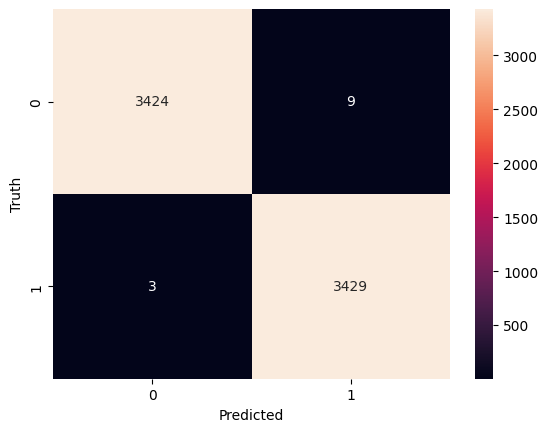

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn

prediction_on_test_data = lr.predict(x_test_features)
cm = confusion_matrix(y_test, prediction_on_test_data)
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Confusion Matrix of model trained by Naive Bayes

Text(50.722222222222214, 0.5, 'Truth')

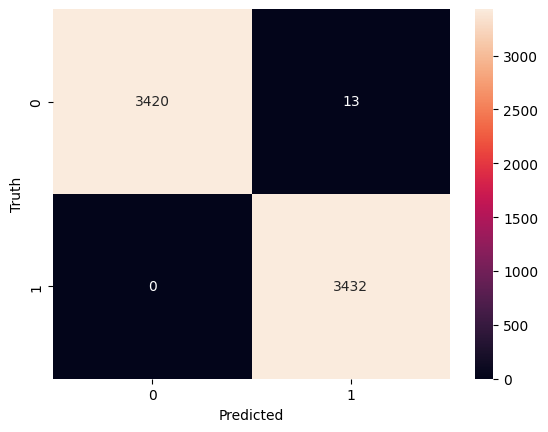

In [ ]:
prediction_on_test_data = mnb.predict(x_test_features)
cm = confusion_matrix(y_test, prediction_on_test_data)
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Classification report of model trained on *Logistic Regression*

In [ ]:
prediction_on_test_data = lr.predict(x_test_features)
print(classification_report(y_test, prediction_on_test_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3433
           1       1.00      1.00      1.00      3432

    accuracy                           1.00      6865
   macro avg       1.00      1.00      1.00      6865
weighted avg       1.00      1.00      1.00      6865



Classification report of model trained on *Naive Bayes*

In [ ]:
prediction_on_test_data = mnb.predict(x_test_features)
print(classification_report(y_test, prediction_on_test_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3433
           1       1.00      1.00      1.00      3432

    accuracy                           1.00      6865
   macro avg       1.00      1.00      1.00      6865
weighted avg       1.00      1.00      1.00      6865

